In [25]:
import pandas as pd
raw = pd.read_csv('../output/moldev_cleaned.csv')
%matplotlib inline

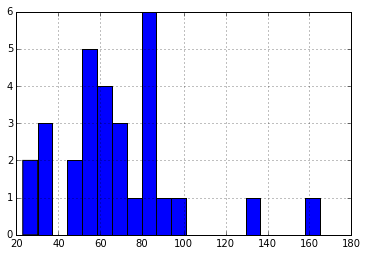

In [30]:
raw[raw['Condition'] == '143B 11.1 uM drug A']['# of FITC spots'].hist(bins=20);